In [2]:
#Preamble
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def generateEllipse(a,b,centerX,centerY, grid):
    for x in range(len(grid)):
        for y in range(len(grid[0])):
            if ((x-centerX)/a)*((x-centerX)/a) + ((y-centerY)/b)*((y-centerY)/b) <= 1:
                grid[x][y] = 1
    
    return grid

In [49]:
def transitSim(a,b,r):
    starGrid = np.zeros([4*b+2*r,2*r])
    ellipseGrid = np.zeros([4*b+2*r,2*r])
    starGrid = generateEllipse(r,r, 2*b+r, r, starGrid)
    ellipseGrid = generateEllipse(a,b,a,b,ellipseGrid)
    planetGrid = np.ones([4*b+2*r,2*r]) - ellipseGrid
    fluxGrid = np.multiply(starGrid,planetGrid)
    initialFlux = np.sum(fluxGrid)
    flux = np.ones(4*b)
    for i in range(4*b):
        planetGrid = np.delete(planetGrid,0,0)
        planetGrid = np.append(planetGrid,np.ones([1,2*r]),0)
    
        fluxGrid = np.multiply(starGrid,fluxGrid)
        percentFlux = np.sum(fluxGrid)/initialFlux
        flux[i] = percentFlux
    
    return flux
    

In [50]:
flux = transitSim(50,50,100)

399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399
399


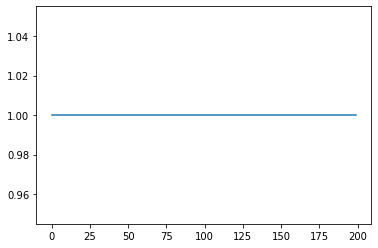

In [51]:
fig = plt.subplot()
fig.plot(flux)
plt.show()